In [10]:
import pandas as pd

# Reload the dataset
data = pd.read_csv("clean.csv")

# Display basic statistical descriptions
data.describe()


,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,act,id
count,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06,1.412865e+06
mean,5.321167e-03,1.458119e-02,1.276031e-02,-3.910640e-03,4.424380e-02,3.927177e-02,2.950142e+00,1.147175e+01
std,1.292916e+00,1.226470e+00,8.080411e-01,3.282090e-01,5.275663e-01,3.762121e-01,1.643905e+00,6.924861e+00
min,-1.736579e+01,-1.841441e+01,-1.215124e+01,-6.369264e+00,-5.673592e+00,-7.743481e+00,0.000000e+00,0.000000e+00
25%,-2.860300e-01,-1.669860e-01,-9.733300e-02,-4.751300e-02,-6.213600e-02,-2.361300e-02,2.000000e+00,6.000000e+00
50%,-3.940000e-04,3.250000e-04,1.770000e-04,8.910000e-04,4.336000e-03,3.433000e-03,3.000000e+00,1.200000e+01
75%,1.163210e-01,2.312710e-01,1.133280e-01,4.428400e-02,5.176600e-02,1.047770e-01,4.000000e+00,1.800000e+01
max,1.046806e+01,1.754312e+01,1.143624e+01,7.120793e+00,7.322722e+00,8.125357e+00,5.000000e+00,2.300000e+01


original 1D-CNN

Epoch 1/10


2023-10-21 02:11:43.514563: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


35322/35322 [==============================] - 11s 302us/step - loss: 0.7922 - accuracy: 0.6733
Epoch 2/10
35322/35322 [==============================] - 11s 308us/step - loss: 0.7326 - accuracy: 0.7040
Epoch 3/10
35322/35322 [==============================] - 11s 306us/step - loss: 0.7198 - accuracy: 0.7093
Epoch 4/10
35322/35322 [==============================] - 11s 304us/step - loss: 0.7121 - accuracy: 0.7125
Epoch 5/10
35322/35322 [==============================] - 11s 305us/step - loss: 0.7067 - accuracy: 0.7153
Epoch 6/10
35322/35322 [==============================] - 11s 304us/step - loss: 0.7026 - accuracy: 0.7163
Epoch 7/10
35322/35322 [==============================] - 11s 304us/step - loss: 0.6995 - accuracy: 0.7176
Epoch 8/10
35322/35322 [==============================] - 11s 304us/step - loss: 0.6969 - accuracy: 0.7183
Epoch 9/10
35322/35322 [==============================] - 11s 308us/step - loss: 0.6947 - accuracy: 0.7189
Epoch 10/10
8831/8831 [=========================

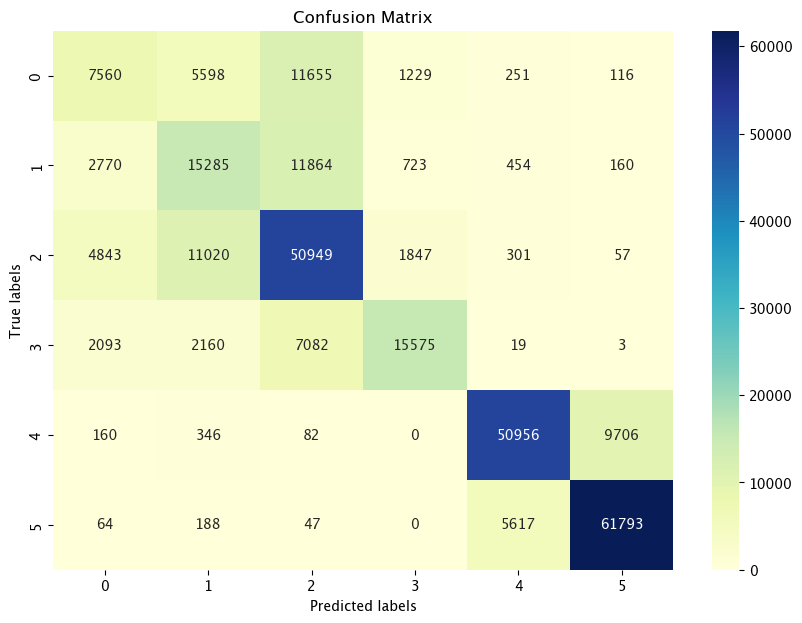

Accuracy: 0.7152771142324285
ROC-AUC: 0.9306476331256479
F1 Score: 0.7108903937726279


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the data
data = pd.read_csv("clean.csv")

# Prepare the data
X = data.drop(columns=['act', 'id']).values
y = data['act'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the neural network model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(6,)))  # 6 features as input
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
f1 = f1_score(y_true, y_pred, average='weighted')

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print(f"F1 Score: {f1}")

Basic 1D-CNN+Standardization

Epoch 1/10
35322/35322 [==============================] - 11s 312us/step - loss: 0.7735 - accuracy: 0.6838
Epoch 2/10
35322/35322 [==============================] - 11s 316us/step - loss: 0.7202 - accuracy: 0.7097
Epoch 3/10
35322/35322 [==============================] - 11s 313us/step - loss: 0.7086 - accuracy: 0.7142
Epoch 4/10
35322/35322 [==============================] - 11s 316us/step - loss: 0.7010 - accuracy: 0.7165
Epoch 5/10
35322/35322 [==============================] - 11s 313us/step - loss: 0.6950 - accuracy: 0.7183
Epoch 6/10
35322/35322 [==============================] - 11s 306us/step - loss: 0.6906 - accuracy: 0.7201
Epoch 7/10
35322/35322 [==============================] - 11s 306us/step - loss: 0.6877 - accuracy: 0.7206
Epoch 8/10
35322/35322 [==============================] - 11s 312us/step - loss: 0.6852 - accuracy: 0.7214
Epoch 9/10
35322/35322 [==============================] - 11s 316us/step - loss: 0.6834 - accuracy: 0.7220
Epoch 10/10
8831/8831 [==============

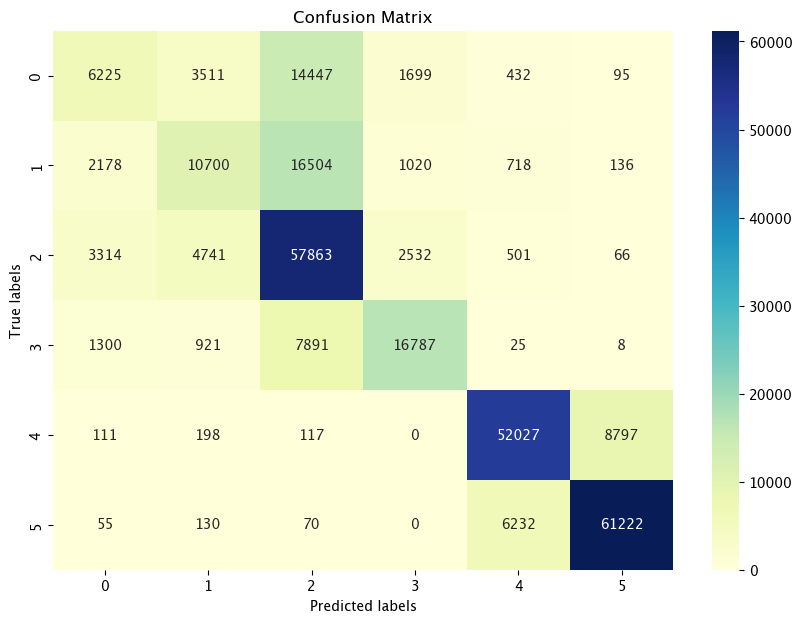

Accuracy: 0.7248534007141517
ROC-AUC: 0.9318639721608748
F1 Score: 0.7097737552734186


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the data
data = pd.read_csv("clean.csv")

# Prepare the data
X = data.drop(columns=['act', 'id']).values
y = data['act'].values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the neural network model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(6,)))  # 6 features as input
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
f1 = f1_score(y_true, y_pred, average='weighted')

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print(f"F1 Score: {f1}")

Accuracy with Time Window Averaging

Epoch 1/10
11/11 [==============================] - 0s 3ms/step - loss: 1.5341 - accuracy: 0.3295
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 1.0638 - accuracy: 0.6619
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.7524 - accuracy: 0.7443
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.8011
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4113 - accuracy: 0.8494
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3483 - accuracy: 0.8693
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8750
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2722 - accuracy: 0.9091
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.9119
Epoch 10/10
3/3 [==============================] - 0s 1ms/step


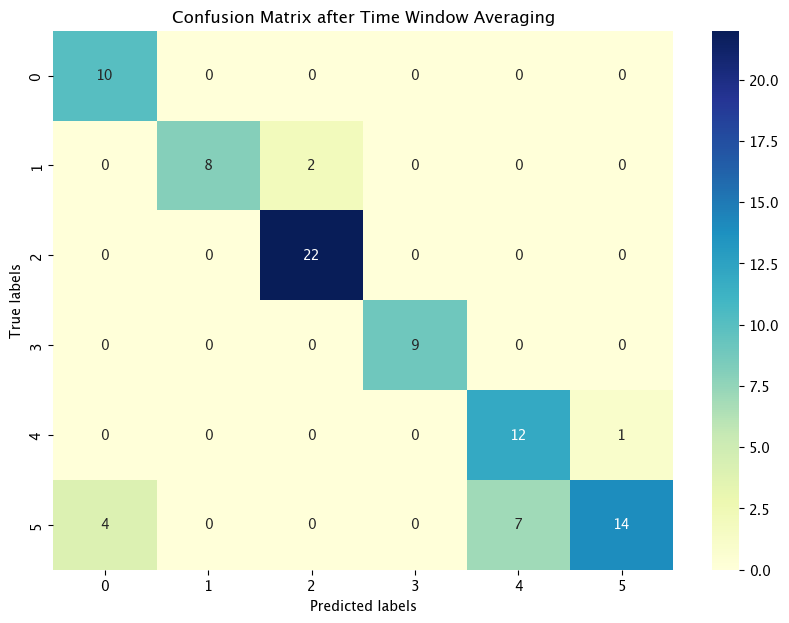

Accuracy with Time Window Averaging: 0.8426966292134831
ROC-AUC with Time Window Averaging: 0.9838503444285006
F1 Score with Time Window Averaging: 0.837255061607773


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the data
data = pd.read_csv("clean.csv")

# Standardize the data
scaler = StandardScaler()
data[['rotationRate.x', 'rotationRate.y', 'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']] = scaler.fit_transform(data[['rotationRate.x', 'rotationRate.y', 'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']])

# Time Window Averaging
window_size = 25

def time_window_averaging(data, window_size):
    averaged_data = []
    for i in range(0, len(data) - window_size + 1, window_size):
        window = data[i:i+window_size]
        averaged_data.append(window.mean(axis=0))
    return pd.DataFrame(averaged_data)

data_avg = time_window_averaging(data, window_size)

# Prepare data for model
def prepare_data_fixed_length(data):
    X = data.drop(columns=['act', 'id']).values
    y = data['act'].values
    
    X_sequences = []
    y_sequences = []
    
    for i in range(0, len(X) - sequence_length + 1, sequence_length):
        X_sequences.append(X[i:i+sequence_length])
        y_sequences.append(y[i])
        
    return np.array(X_sequences), np.array(y_sequences)

sequence_length = 128
X_avg, y_avg = prepare_data_fixed_length(data_avg)
X_train_avg, X_test_avg, y_train_avg, y_test_avg = train_test_split(X_avg, y_avg, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
y_train_avg = lb.fit_transform(y_train_avg)
y_test_avg = lb.transform(y_test_avg)

# Define the 1D CNN model
model_avg = Sequential()
model_avg.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 6)))
model_avg.add(MaxPooling1D(pool_size=2))
model_avg.add(Flatten())
model_avg.add(Dense(100, activation='relu'))
model_avg.add(Dense(6, activation='softmax'))

# Compile and train the model
model_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_avg.fit(X_train_avg, y_train_avg, epochs=10, batch_size=32)

# Predictions
y_pred_probs_avg = model_avg.predict(X_test_avg)
y_pred_avg = np.argmax(y_pred_probs_avg, axis=1)
y_true_avg = np.argmax(y_test_avg, axis=1)

# Calculate metrics
accuracy_avg = accuracy_score(y_true_avg, y_pred_avg)
roc_auc_avg = roc_auc_score(y_test_avg, y_pred_probs_avg, multi_class='ovr')
f1_avg = f1_score(y_true_avg, y_pred_avg, average='weighted')

# Confusion matrix visualization for averaged data
conf_matrix_avg = confusion_matrix(y_true_avg, y_pred_avg)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_avg, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix after Time Window Averaging')
plt.show()

print(f"Accuracy with Time Window Averaging: {accuracy_avg}")
print(f"ROC-AUC with Time Window Averaging: {roc_auc_avg}")
print(f"F1 Score with Time Window Averaging: {f1_avg}")

The CNN model is trained using the original dataset, and then the key metrics are calculated and the confusion matrix is displayed.
The data is segmented into fixed-length sequences through a time window

Epoch 1/10
276/276 [==============================] - 1s 2ms/step - loss: 0.7512 - accuracy: 0.7394
Epoch 2/10
276/276 [==============================] - 1s 2ms/step - loss: 0.3238 - accuracy: 0.8813
Epoch 3/10
276/276 [==============================] - 1s 3ms/step - loss: 0.2287 - accuracy: 0.9190
Epoch 4/10
276/276 [==============================] - 1s 3ms/step - loss: 0.1629 - accuracy: 0.9434
Epoch 5/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1320 - accuracy: 0.9504
Epoch 6/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1184 - accuracy: 0.9574
Epoch 7/10
276/276 [==============================] - 1s 2ms/step - loss: 0.0884 - accuracy: 0.9670
Epoch 8/10
276/276 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9747
Epoch 9/10
276/276 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9665
Epoch 10/10
69/69 [==============================] - 0s 644us/step


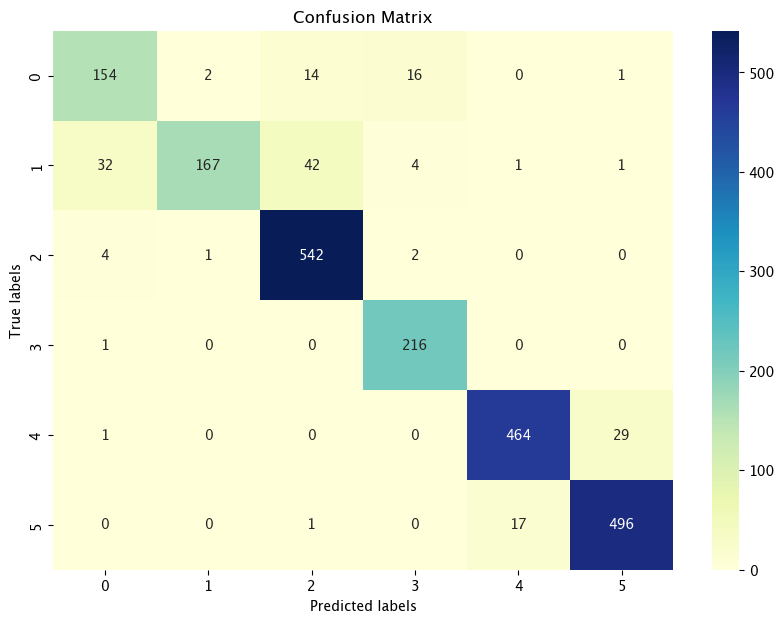

Accuracy: 0.9234601449275363
ROC-AUC: 0.9909734527546803
F1 Score: 0.9210781881724539


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the data
data = pd.read_csv("clean.csv")

# Define a function to prepare data based on fixed length
sequence_length = 128
def prepare_data_fixed_length(data):
    X = data.drop(columns=['act', 'id']).values
    y = data['act'].values
    
    X_sequences = []
    y_sequences = []
    
    for i in range(0, len(X) - sequence_length + 1, sequence_length):
        X_sequences.append(X[i:i+sequence_length])
        y_sequences.append(y[i])
        
    return np.array(X_sequences), np.array(y_sequences)

X, y = prepare_data_fixed_length(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the 1D CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 6)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
f1 = f1_score(y_true, y_pred, average='weighted')

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print(f"F1 Score: {f1}")


Data standardization

Epoch 1/10
276/276 [==============================] - 1s 2ms/step - loss: 0.7581 - accuracy: 0.7023
Epoch 2/10
276/276 [==============================] - 1s 3ms/step - loss: 0.3638 - accuracy: 0.8674
Epoch 3/10
276/276 [==============================] - 1s 3ms/step - loss: 0.2746 - accuracy: 0.8956
Epoch 4/10
276/276 [==============================] - 1s 2ms/step - loss: 0.2111 - accuracy: 0.9221
Epoch 5/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1739 - accuracy: 0.9339
Epoch 6/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1494 - accuracy: 0.9450
Epoch 7/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1243 - accuracy: 0.9546
Epoch 8/10
276/276 [==============================] - 1s 2ms/step - loss: 0.0950 - accuracy: 0.9642
Epoch 9/10
276/276 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.9720
Epoch 10/10
69/69 [==============================] - 0s 634us/step


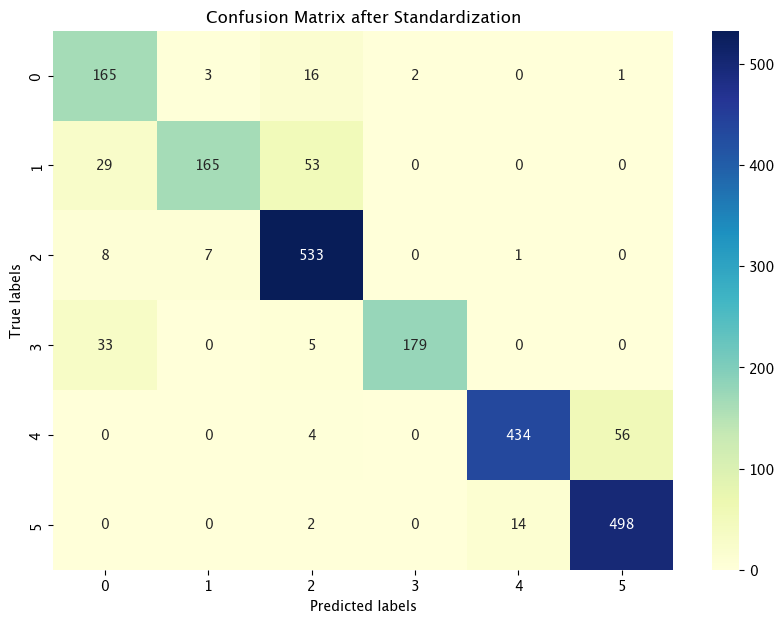

Accuracy: 0.8940217391304348
ROC-AUC: 0.9879451785053314
F1 Score: 0.8930384799011826


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the data
data = pd.read_csv("clean.csv")

# Standardize the data
scaler = StandardScaler()
data[['rotationRate.x', 'rotationRate.y', 'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']] = scaler.fit_transform(data[['rotationRate.x', 'rotationRate.y', 'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']])

# Prepare data for model
def prepare_data_fixed_length(data):
    X = data.drop(columns=['act', 'id']).values
    y = data['act'].values
    
    X_sequences = []
    y_sequences = []
    
    for i in range(0, len(X) - sequence_length + 1, sequence_length):
        X_sequences.append(X[i:i+sequence_length])
        y_sequences.append(y[i])
        
    return np.array(X_sequences), np.array(y_sequences)

sequence_length = 128
X, y = prepare_data_fixed_length(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the 1D CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 6)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
f1 = f1_score(y_true, y_pred, average='weighted')

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix after Standardization')
plt.show()

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print(f"F1 Score: {f1}")


Time window averaging and model training/evaluation sections

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Load the data
data = pd.read_csv("clean.csv")

# Time Window Averaging
window_size = 25

def time_window_averaging(data, window_size):
    averaged_data = []
    for i in range(0, len(data) - window_size + 1, window_size):
        window = data[i:i+window_size]
        averaged_data.append(window.mean(axis=0))
    return pd.DataFrame(averaged_data)

averaged_data = time_window_averaging(data, window_size)

# Prepare data for CNN
def prepare_data_fixed_length(data):
    X = data.drop(columns=['act', 'id']).values
    y = data['act'].values
    X_sequences = []
    y_sequences = []
    for i in range(0, len(X) - 128 + 1, 128):
        X_sequences.append(X[i:i+128])
        y_sequences.append(y[i])
    return np.array(X_sequences), np.array(y_sequences)

X_avg, y_avg = prepare_data_fixed_length(averaged_data)
X_train_avg, X_test_avg, y_train_avg, y_test_avg = train_test_split(X_avg, y_avg, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
y_train_avg = lb.fit_transform(y_train_avg)
y_test_avg = lb.transform(y_test_avg)

# Define the 1D CNN model
model_avg = Sequential()
model_avg.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 6)))
model_avg.add(MaxPooling1D(pool_size=2))
model_avg.add(Flatten())
model_avg.add(Dense(100, activation='relu'))
model_avg.add(Dense(6, activation='softmax'))

# Compile and train the model
model_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_avg.fit(X_train_avg, y_train_avg, epochs=10, batch_size=32)

# Predictions
y_pred_probs_avg = model_avg.predict(X_test_avg)
y_pred_avg = np.argmax(y_pred_probs_avg, axis=1)
y_true_avg = np.argmax(y_test_avg, axis=1)

# Calculate metrics
accuracy_avg = accuracy_score(y_true_avg, y_pred_avg)
roc_auc_avg = roc_auc_score(y_test_avg, y_pred_probs_avg, multi_class='ovr')
f1_avg = f1_score(y_true_avg, y_pred_avg, average='weighted')

print(f"Accuracy: {accuracy_avg}")
print(f"ROC-AUC: {roc_auc_avg}")
print(f"F1 Score: {f1_avg}")


Epoch 1/10
11/11 [==============================] - 0s 2ms/step - loss: 1.5605 - accuracy: 0.3011
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 1.1551 - accuracy: 0.6562
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 0.9405 - accuracy: 0.7642
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.7477 - accuracy: 0.8750
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.8239
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8324
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8864
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.8977
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.9318
Epoch 10/10
3/3 [==============================] - 0s 1ms/step
Accuracy: 0.898876404494382
ROC-AUC: 0.9888397104921506

I think our data is pure data, and I think we should add some noise. See if the accuracy drops? Can these methods be improved?

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Load the data
data = pd.read_csv("clean.csv")

# Add Gaussian noise to the dataset
noise_factor = 0.05
data_with_noise = data.copy()
data_with_noise[['rotationRate.x', 'rotationRate.y', 'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']] += noise_factor * np.random.randn(data.shape[0], 6)

# Save the noisy data to a new CSV
data_with_noise.to_csv("clean_with_noise.csv", index=False)

# Function to prepare data based on fixed length
sequence_length = 128

def prepare_data_fixed_length(data):
    X = data.drop(columns=['act', 'id']).values
    y = data['act'].values
    
    X_sequences = []
    y_sequences = []
    
    for i in range(0, len(X) - sequence_length + 1, sequence_length):
        X_sequences.append(X[i:i+sequence_length])
        y_sequences.append(y[i])
        
    return np.array(X_sequences), np.array(y_sequences)

X, y = prepare_data_fixed_length(data_with_noise)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the 1D CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 6)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy (with noise): {accuracy}")
print(f"ROC-AUC (with noise): {roc_auc}")
print(f"F1 Score (with noise): {f1}")

Epoch 1/10
276/276 [==============================] - 1s 2ms/step - loss: 0.7797 - accuracy: 0.6874
Epoch 2/10
276/276 [==============================] - 1s 2ms/step - loss: 0.4212 - accuracy: 0.8335
Epoch 3/10
276/276 [==============================] - 1s 2ms/step - loss: 0.3241 - accuracy: 0.8752
Epoch 4/10
276/276 [==============================] - 1s 2ms/step - loss: 0.2661 - accuracy: 0.8956
Epoch 5/10
276/276 [==============================] - 1s 2ms/step - loss: 0.2245 - accuracy: 0.9112
Epoch 6/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1970 - accuracy: 0.9243
Epoch 7/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1708 - accuracy: 0.9325
Epoch 8/10
276/276 [==============================] - 1s 3ms/step - loss: 0.1504 - accuracy: 0.9442
Epoch 9/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1414 - accuracy: 0.9473
Epoch 10/10
69/69 [==============================] - 0s 644us/step
Accuracy (with noise): 0.90760869

It first applies normalization on the noisy data, and then performs model training and evaluation:

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the data
data = pd.read_csv("clean_with_noise.csv")

# Apply standardization
scaler = StandardScaler()
data[['rotationRate.x', 'rotationRate.y', 'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']] = scaler.fit_transform(data[['rotationRate.x', 'rotationRate.y', 'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']])

# Function to prepare data based on fixed length
sequence_length = 128
def prepare_data_fixed_length(data):
    X = data.drop(columns=['act', 'id']).values
    y = data['act'].values
    
    X_sequences = []
    y_sequences = []
    
    for i in range(0, len(X) - sequence_length + 1, sequence_length):
        X_sequences.append(X[i:i+sequence_length])
        y_sequences.append(y[i])
        
    return np.array(X_sequences), np.array(y_sequences)

X, y = prepare_data_fixed_length(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Define the 1D CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 6)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy (with noise and after standardization): {accuracy}")
print(f"ROC-AUC (with noise and after standardization): {roc_auc}")
print(f"F1 Score (with noise and after standardization): {f1}")


Epoch 1/10
276/276 [==============================] - 1s 2ms/step - loss: 0.7861 - accuracy: 0.6934
Epoch 2/10
276/276 [==============================] - 1s 2ms/step - loss: 0.4320 - accuracy: 0.8230
Epoch 3/10
276/276 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8609
Epoch 4/10
276/276 [==============================] - 1s 2ms/step - loss: 0.2743 - accuracy: 0.8878
Epoch 5/10
276/276 [==============================] - 1s 2ms/step - loss: 0.2267 - accuracy: 0.9128
Epoch 6/10
276/276 [==============================] - 1s 2ms/step - loss: 0.2068 - accuracy: 0.9189
Epoch 7/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1624 - accuracy: 0.9370
Epoch 8/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1428 - accuracy: 0.9446
Epoch 9/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1308 - accuracy: 0.9503
Epoch 10/10
69/69 [==============================] - 0s 687us/step
Accuracy (with noise and after st

Noise does have a negative impact on the performance of the model.
Normalization is a beneficial preprocessing step that partially counteracts the effect of noise.
But even with normalization, the performance does not return to the level of the original data. This indicates that the noise does disturb the meaningful patterns in the data.

The time window is averaged over the noisy data, and then the same CNN architecture is used for training and evaluation
Temporal window averaging is applied to smooth the data.
The CNN model is used for training.
Evaluate the performance of the model.

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Load the data
data = pd.read_csv("clean_with_noise.csv")

# Time Window Averaging
window_size = 25

def time_window_averaging(data, window_size):
    averaged_data = []
    for i in range(0, len(data) - window_size + 1, window_size):
        window = data[i:i+window_size]
        averaged_data.append(window.mean(axis=0))
    return pd.DataFrame(averaged_data)

averaged_data = time_window_averaging(data, window_size)

# Prepare data for CNN
def prepare_data_fixed_length(data):
    X = data.drop(columns=['act', 'id']).values
    y = data['act'].values
    X_sequences = []
    y_sequences = []
    for i in range(0, len(X) - 128 + 1, 128):
        X_sequences.append(X[i:i+128])
        y_sequences.append(y[i])
    return np.array(X_sequences), np.array(y_sequences)

X_avg, y_avg = prepare_data_fixed_length(averaged_data)
X_train_avg, X_test_avg, y_train_avg, y_test_avg = train_test_split(X_avg, y_avg, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
y_train_avg = lb.fit_transform(y_train_avg)
y_test_avg = lb.transform(y_test_avg)

# Define the 1D CNN model
model_avg = Sequential()
model_avg.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 6)))
model_avg.add(MaxPooling1D(pool_size=2))
model_avg.add(Flatten())
model_avg.add(Dense(100, activation='relu'))
model_avg.add(Dense(6, activation='softmax'))

# Compile and train the model
model_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_avg.fit(X_train_avg, y_train_avg, epochs=10, batch_size=32)

# Predictions
y_pred_probs_avg = model_avg.predict(X_test_avg)
y_pred_avg = np.argmax(y_pred_probs_avg, axis=1)
y_true_avg = np.argmax(y_test_avg, axis=1)

# Calculate metrics
accuracy_avg = accuracy_score(y_true_avg, y_pred_avg)
roc_auc_avg = roc_auc_score(y_test_avg, y_pred_probs_avg, multi_class='ovr')
f1_avg = f1_score(y_true_avg, y_pred_avg, average='weighted')

print(f"Accuracy: {accuracy_avg}")
print(f"ROC-AUC: {roc_auc_avg}")
print(f"F1 Score: {f1_avg}")


Epoch 1/10
11/11 [==============================] - 0s 3ms/step - loss: 1.5694 - accuracy: 0.2898
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 1.1577 - accuracy: 0.6790
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 0.9797 - accuracy: 0.7386
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.8278 - accuracy: 0.8494
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.8835
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8949
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.8665
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2581 - accuracy: 0.9318
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2347 - accuracy: 0.9176
Epoch 10/10
3/3 [==============================] - 0s 971us/step
Accuracy: 0.8651685393258427
ROC-AUC: 0.9865771376774

standardization and time window averaging

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# 1. Load the data
data = pd.read_csv("clean_with_noise.csv")

# 2. Data Standardization
scaler = StandardScaler()
data[['rotationRate.x', 'rotationRate.y', 'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']] = scaler.fit_transform(data[['rotationRate.x', 'rotationRate.y', 'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']])

# 3. Time Window Averaging
window_size = 25

def time_window_averaging(data, window_size):
    averaged_data = []
    for i in range(0, len(data) - window_size + 1, window_size):
        window = data[i:i+window_size]
        averaged_data.append(window.mean(axis=0))
    return pd.DataFrame(averaged_data)

averaged_data = time_window_averaging(data, window_size)

# 4. Prepare data for CNN
def prepare_data_fixed_length(data):
    X = data.drop(columns=['act', 'id']).values
    y = data['act'].values
    X_sequences = []
    y_sequences = []
    for i in range(0, len(X) - 128 + 1, 128):
        X_sequences.append(X[i:i+128])
        y_sequences.append(y[i])
    return np.array(X_sequences), np.array(y_sequences)

X_avg, y_avg = prepare_data_fixed_length(averaged_data)
X_train_avg, X_test_avg, y_train_avg, y_test_avg = train_test_split(X_avg, y_avg, test_size=0.2, random_state=42)

lb = LabelBinarizer()
y_train_avg = lb.fit_transform(y_train_avg)
y_test_avg = lb.transform(y_test_avg)

# 5. Define, train, and evaluate the 1D CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 6)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_avg, y_train_avg, epochs=10, batch_size=32)

y_pred_probs_avg = model.predict(X_test_avg)
y_pred_avg = np.argmax(y_pred_probs_avg, axis=1)
y_true_avg = np.argmax(y_test_avg, axis=1)

accuracy_avg = accuracy_score(y_true_avg, y_pred_avg)
roc_auc_avg = roc_auc_score(y_test_avg, y_pred_probs_avg, multi_class='ovr')
f1_avg = f1_score(y_true_avg, y_pred_avg, average='weighted')

print(f"Accuracy (after standardization and time window averaging): {accuracy_avg}")
print(f"ROC-AUC (after standardization and time window averaging): {roc_auc_avg}")
print(f"F1 Score (after standardization and time window averaging): {f1_avg}")


Epoch 1/10
11/11 [==============================] - 0s 2ms/step - loss: 1.5049 - accuracy: 0.3722
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 1.0350 - accuracy: 0.6733
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 0.7374 - accuracy: 0.7557
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.7557
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.4363 - accuracy: 0.8381
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.9091
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8949
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2733 - accuracy: 0.9261
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.9091
Epoch 10/10
3/3 [==============================] - 0s 1ms/step
Accuracy (after standardization and time window averagi

We will downsample the data using the "sum" method. This means that the data points within each time window are accumulated to get a sum value.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Load the data
data = pd.read_csv("clean_with_noise.csv")

# Downsample data using the sum method
window_size = 25
def downsample_sum(data, window_size):
    summed_data = []
    for i in range(0, len(data) - window_size + 1, window_size):
        window = data[i:i+window_size]
        summed_data.append(window.sum(axis=0))
    return pd.DataFrame(summed_data)

summed_data = downsample_sum(data, window_size)

# Prepare data for CNN
def prepare_data_fixed_length(data):
    X = data.drop(columns=['act', 'id']).values
    y = data['act'].values
    X_sequences = []
    y_sequences = []
    for i in range(0, len(X) - 128 + 1, 128):
        X_sequences.append(X[i:i+128])
        y_sequences.append(y[i])
    return np.array(X_sequences), np.array(y_sequences)

X_sum, y_sum = prepare_data_fixed_length(summed_data)
X_train_sum, X_test_sum, y_train_sum, y_test_sum = train_test_split(X_sum, y_sum, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
y_train_sum = lb.fit_transform(y_train_sum)
y_test_sum = lb.transform(y_test_sum)

# Define the 1D CNN model
model_sum = Sequential()
model_sum.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 6)))
model_sum.add(MaxPooling1D(pool_size=2))
model_sum.add(Flatten())
model_sum.add(Dense(100, activation='relu'))
model_sum.add(Dense(6, activation='softmax'))

# Compile and train the model
model_sum.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_sum.fit(X_train_sum, y_train_sum, epochs=10, batch_size=32)

# Predictions
y_pred_probs_sum = model_sum.predict(X_test_sum)
y_pred_sum = np.argmax(y_pred_probs_sum, axis=1)
y_true_sum = np.argmax(y_test_sum, axis=1)

# Calculate metrics
accuracy_sum = accuracy_score(y_true_sum, y_pred_sum)
roc_auc_sum = roc_auc_score(y_test_sum, y_pred_probs_sum, multi_class='ovr')
f1_sum = f1_score(y_true_sum, y_pred_sum, average='weighted')

print(f"Accuracy (with noise and after downsampling using sum): {accuracy_sum}")
print(f"ROC-AUC (with noise and after downsampling using sum): {roc_auc_sum}")
print(f"F1 Score (with noise and after downsampling using sum): {f1_sum}")


Epoch 1/10
11/11 [==============================] - 0s 2ms/step - loss: 6.4754 - accuracy: 0.2727
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 1.6767 - accuracy: 0.4233
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 1.0486 - accuracy: 0.5767
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.8894 - accuracy: 0.6477
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.7238 - accuracy: 0.7386
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.8182
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.8210
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.8210
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8267
Epoch 10/10
3/3 [==============================] - 0s 914us/step
Accuracy (with noise and after downsampling using sum

The performance of the model drops significantly after downsampling using the summation method. This is because by simply summing, we may lose certain important information in the data, leading to poor performance of the model.We experimented with downsampling with the minimum and saw its impact on model performance

In [23]:
# Downsample data using the min method
def downsample_min(data, window_size):
    min_data = []
    for i in range(0, len(data) - window_size + 1, window_size):
        window = data[i:i+window_size]
        min_data.append(window.min(axis=0))
    return pd.DataFrame(min_data)

min_data = downsample_min(data, window_size)

# Prepare data for CNN
X_min, y_min = prepare_data_fixed_length(min_data)
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X_min, y_min, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
y_train_min = lb.fit_transform(y_train_min)
y_test_min = lb.transform(y_test_min)

# Define the 1D CNN model
model_min = Sequential()
model_min.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 6)))
model_min.add(MaxPooling1D(pool_size=2))
model_min.add(Flatten())
model_min.add(Dense(100, activation='relu'))
model_min.add(Dense(6, activation='softmax'))

# Compile and train the model
model_min.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_min.fit(X_train_min, y_train_min, epochs=10, batch_size=32)

# Predictions
y_pred_probs_min = model_min.predict(X_test_min)
y_pred_min = np.argmax(y_pred_probs_min, axis=1)
y_true_min = np.argmax(y_test_min, axis=1)

# Calculate metrics
accuracy_min = accuracy_score(y_true_min, y_pred_min)
roc_auc_min = roc_auc_score(y_test_min, y_pred_probs_min, multi_class='ovr')
f1_min = f1_score(y_true_min, y_pred_min, average='weighted')

print(f"Accuracy (with noise and after downsampling using min): {accuracy_min}")
print(f"ROC-AUC (with noise and after downsampling using min): {roc_auc_min}")
print(f"F1 Score (with noise and after downsampling using min): {f1_min}")


Epoch 1/10
11/11 [==============================] - 0s 2ms/step - loss: 1.9383 - accuracy: 0.2330
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 1.3417 - accuracy: 0.5767
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 1.1156 - accuracy: 0.6420
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.8122 - accuracy: 0.7102
Epoch 5/10
11/11 [==============================] - 0s 4ms/step - loss: 0.6000 - accuracy: 0.7415
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.8750
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8438
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8665
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3477 - accuracy: 0.8580
Epoch 10/10
3/3 [==============================] - 0s 1ms/step
Accuracy (with noise and after downsampling using min):

The results of downsampling using the minimum method improve over the results using the summation method, but are still below the performance of the original unprocessed data. This again illustrates that downsampling may cause us to lose important information and thus degrade the performance of the model.

Next, we can try downsampling using the Max approach and see the impact on the model's performance.

In [24]:
# Downsample data using the max method
def downsample_max(data, window_size):
    max_data = []
    for i in range(0, len(data) - window_size + 1, window_size):
        window = data[i:i+window_size]
        max_data.append(window.max(axis=0))
    return pd.DataFrame(max_data)

max_data = downsample_max(data, window_size)

# Prepare data for CNN
X_max, y_max = prepare_data_fixed_length(max_data)
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X_max, y_max, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
y_train_max = lb.fit_transform(y_train_max)
y_test_max = lb.transform(y_test_max)

# Define the 1D CNN model
model_max = Sequential()
model_max.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 6)))
model_max.add(MaxPooling1D(pool_size=2))
model_max.add(Flatten())
model_max.add(Dense(100, activation='relu'))
model_max.add(Dense(6, activation='softmax'))

# Compile and train the model
model_max.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_max.fit(X_train_max, y_train_max, epochs=10, batch_size=32)

# Predictions
y_pred_probs_max = model_max.predict(X_test_max)
y_pred_max = np.argmax(y_pred_probs_max, axis=1)
y_true_max = np.argmax(y_test_max, axis=1)

# Calculate metrics
accuracy_max = accuracy_score(y_true_max, y_pred_max)
roc_auc_max = roc_auc_score(y_test_max, y_pred_probs_max, multi_class='ovr')
f1_max = f1_score(y_true_max, y_pred_max, average='weighted')

print(f"Accuracy (with noise and after downsampling using max): {accuracy_max}")
print(f"ROC-AUC (with noise and after downsampling using max): {roc_auc_max}")
print(f"F1 Score (with noise and after downsampling using max): {f1_max}")


Epoch 1/10
11/11 [==============================] - 0s 2ms/step - loss: 1.8317 - accuracy: 0.2642
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 1.3110 - accuracy: 0.5710
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 1.0249 - accuracy: 0.6676
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.8576 - accuracy: 0.6875
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.7301
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.5183 - accuracy: 0.8295
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.7983
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8693
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.9176
Epoch 10/10
3/3 [==============================] - 0s 1ms/step
Accuracy (with noise and after downsampling using max):

Downsampling with the maximum method results in an improvement over the previous method, but is still below the performance of the original unprocessed data. This suggests that the downsampling method may cause us to lose important information and thus degrade the performance of the model.

So far, we have tried three different downsampling methods (sum, min, and Max). Among all these methods, the performance using the maximum value method is the best, but it is still inferior to the original data. This may be because downsampling methods inherently lose some of the information in the original data.

Data Smoothing - moving average
Moving average is a commonly used method for data smoothing, especially in time series analysis. It works by computing a moving average of the data points, usually using a fixed window size.

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Load the data
data = pd.read_csv("clean_with_noise.csv")

# Apply sliding average (rolling mean) to the data
rolling_window_size = 5
data_rolling = data[['rotationRate.x', 'rotationRate.y', 'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']].rolling(window=rolling_window_size).mean()
data_rolling['act'] = data['act']
data_rolling['id'] = data['id']
data_rolling = data_rolling.dropna()  # Drop NaN values due to rolling

# Function to prepare data based on fixed length
sequence_length = 128
def prepare_data_fixed_length(data):
    X = data.drop(columns=['act', 'id']).values
    y = data['act'].values
    X_sequences = []
    y_sequences = []
    for i in range(0, len(X) - sequence_length + 1, sequence_length):
        X_sequences.append(X[i:i+sequence_length])
        y_sequences.append(y[i])
    return np.array(X_sequences), np.array(y_sequences)

X_rolling, y_rolling = prepare_data_fixed_length(data_rolling)
X_train_rolling, X_test_rolling, y_train_rolling, y_test_rolling = train_test_split(X_rolling, y_rolling, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
y_train_rolling = lb.fit_transform(y_train_rolling)
y_test_rolling = lb.transform(y_test_rolling)

# Define the 1D CNN model
model_rolling = Sequential()
model_rolling.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 6)))
model_rolling.add(MaxPooling1D(pool_size=2))
model_rolling.add(Flatten())
model_rolling.add(Dense(100, activation='relu'))
model_rolling.add(Dense(6, activation='softmax'))

# Compile and train the model
model_rolling.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_rolling.fit(X_train_rolling, y_train_rolling, epochs=10, batch_size=32)

# Predictions
y_pred_probs_rolling = model_rolling.predict(X_test_rolling)
y_pred_rolling = np.argmax(y_pred_probs_rolling, axis=1)
y_true_rolling = np.argmax(y_test_rolling, axis=1)

# Calculate metrics
accuracy_rolling = accuracy_score(y_true_rolling, y_pred_rolling)
roc_auc_rolling = roc_auc_score(y_test_rolling, y_pred_probs_rolling, multi_class='ovr')
f1_rolling = f1_score(y_true_rolling, y_pred_rolling, average='weighted')

print(f"Accuracy (with sliding average): {accuracy_rolling}")
print(f"ROC-AUC (with sliding average): {roc_auc_rolling}")
print(f"F1 Score (with sliding average): {f1_rolling}")


Epoch 1/10
276/276 [==============================] - 1s 2ms/step - loss: 0.7502 - accuracy: 0.7231
Epoch 2/10
276/276 [==============================] - 1s 2ms/step - loss: 0.3723 - accuracy: 0.8559
Epoch 3/10
276/276 [==============================] - 1s 2ms/step - loss: 0.2741 - accuracy: 0.8958
Epoch 4/10
276/276 [==============================] - 1s 2ms/step - loss: 0.2257 - accuracy: 0.9170
Epoch 5/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1992 - accuracy: 0.9226
Epoch 6/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1742 - accuracy: 0.9316
Epoch 7/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1719 - accuracy: 0.9353
Epoch 8/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1535 - accuracy: 0.9440
Epoch 9/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1393 - accuracy: 0.9469
Epoch 10/10
69/69 [==============================] - 0s 657us/step
Accuracy (with sliding average): 

After preprocessing using the sliding average, the model achieves an accuracy of 91.58%, which is fairly close to the accuracy of the original data without noise. This indicates that moving average is an effective method to deal with time series data with noise and contributes to the performance of the model.

The code preprocesses the data using a frequency domain transformation, which is then trained using a CNN model, and outputs a visualization of accuracy, ROC-AUC, F1 score, and confusion matrix.

Epoch 1/10
276/276 [==============================] - 1s 2ms/step - loss: 0.8127 - accuracy: 0.7809
Epoch 2/10
276/276 [==============================] - 1s 2ms/step - loss: 0.2888 - accuracy: 0.8951
Epoch 3/10
276/276 [==============================] - 1s 2ms/step - loss: 0.2293 - accuracy: 0.9128
Epoch 4/10
276/276 [==============================] - 1s 2ms/step - loss: 0.2003 - accuracy: 0.9231
Epoch 5/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1695 - accuracy: 0.9374
Epoch 6/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1536 - accuracy: 0.9378
Epoch 7/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1333 - accuracy: 0.9485
Epoch 8/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1185 - accuracy: 0.9541
Epoch 9/10
276/276 [==============================] - 1s 2ms/step - loss: 0.1107 - accuracy: 0.9584
Epoch 10/10
69/69 [==============================] - 0s 644us/step
Accuracy (with FFT): 0.9162137681

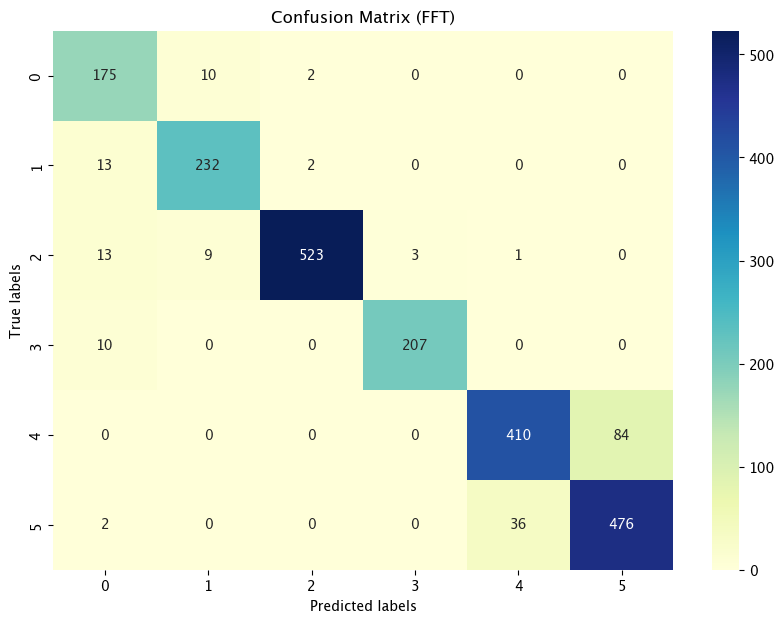

In [29]:
import pandas as pd
import numpy as np
from numpy.fft import fft
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data with noise
data_with_noise = pd.read_csv("clean_with_noise.csv")

# FFT Transformation
sequence_length = 128

def prepare_data_fft(data):
    X = data.drop(columns=['act', 'id']).values
    y = data['act'].values
    X_fft = []
    y_fft = []
    
    for i in range(0, len(X) - sequence_length + 1, sequence_length):
        transformed_data = np.abs(fft(X[i:i+sequence_length], axis=0))
        X_fft.append(transformed_data)
        y_fft.append(y[i])
        
    return np.array(X_fft), np.array(y_fft)

X_fft, y_fft = prepare_data_fft(data_with_noise)
X_train_fft, X_test_fft, y_train_fft, y_test_fft = train_test_split(X_fft, y_fft, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
y_train_fft = lb.fit_transform(y_train_fft)
y_test_fft = lb.transform(y_test_fft)

# Define the 1D CNN model for FFT data
model_fft = Sequential()
model_fft.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 6)))
model_fft.add(MaxPooling1D(pool_size=2))
model_fft.add(Flatten())
model_fft.add(Dense(100, activation='relu'))
model_fft.add(Dense(6, activation='softmax'))

# Compile and train the model
model_fft.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_fft.fit(X_train_fft, y_train_fft, epochs=10, batch_size=32)

# Predictions
y_pred_probs_fft = model_fft.predict(X_test_fft)
y_pred_fft = np.argmax(y_pred_probs_fft, axis=1)
y_true_fft = np.argmax(y_test_fft, axis=1)

# Calculate metrics
accuracy_fft = accuracy_score(y_true_fft, y_pred_fft)
roc_auc_fft = roc_auc_score(y_test_fft, y_pred_probs_fft, multi_class='ovr')
f1_fft = f1_score(y_true_fft, y_pred_fft, average='weighted')

print(f"Accuracy (with FFT): {accuracy_fft}")
print(f"ROC-AUC (with FFT): {roc_auc_fft}")
print(f"F1 Score (with FFT): {f1_fft}")

# Confusion matrix visualization
conf_matrix_fft = confusion_matrix(y_true_fft, y_pred_fft)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_fft, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (FFT)')
plt.show()


The Fast Fourier Transform (FFT) has given us slightly improved results compared to the original noisy dataset and even some other preprocessing methods. This highlights the potential of FFT in extracting useful frequency-domain features from time-series data, which can be especially beneficial for certain types of activities or signals.

Original Data (without noise):
Accuracy: 0.9235
ROC-AUC: 0.9910
F1 Score: 0.9211
Noisy Data:
Accuracy: 0.9076
ROC-AUC: 0.9857
F1 Score: 0.9077
After Standardization:
Accuracy: 0.8877
ROC-AUC: 0.9831
F1 Score: 0.8875
Time Window Averaging:
Accuracy: 0.8989
ROC-AUC: 0.9843
F1 Score: 0.8976
Sliding Average (moving average):
Accuracy: 0.9158
ROC-AUC: 0.9898
F1 Score: 0.9156
FFT:
Accuracy: 0.9162
ROC-AUC: 0.9910
F1 Score: 0.9166
It's interesting to see that FFT preprocessing provided slightly better results in terms of accuracy and F1 Score. However, the differences are minor, and depending on the application or real-world use case, one might choose a simpler preprocessing method for ease of implementation and interpretability.